In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DICT_MESES = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}


In [3]:
path_limpos = "Tratados"
path_brutos = "Brutos"

In [38]:
path_ena_bruto = path_brutos+"\\Simples_Energia_Natural_Afluente_Subsistema_Barra__data.csv"
path_carga_bruto = path_brutos+"\\Simples_Carga_de_Energia_Barra_Mês_data.csv"
path_vazao_bruto = path_brutos+"\\vazao_mensal_juazeiro_sf.csv"

In [65]:
ena_bruto = pd.read_csv(path_ena_bruto)
carga_bruto = pd.read_csv(path_carga_bruto)
vazao_bruto = pd.read_csv(path_vazao_bruto,on_bad_lines='skip',sep=";")

In [6]:
datas_brutas_ena = ena_bruto.iloc[:,0]
datas_brutas_carga= carga_bruto.iloc[:,0]

In [7]:
def limpa_datas_ena_carga(datas_brutas, DICT_MESES):

    df_limpo = pd.DataFrame()
    meses_brutos = datas_brutas.apply(lambda x: x.split(" ")[0])
    anos_brutos = datas_brutas.apply(lambda x: x.split(" ")[1])

    df_limpo["Month"] = meses_brutos.apply(lambda x: DICT_MESES[x])
    df_limpo["Year"] = anos_brutos

    df_limpo["Data"] = pd.to_datetime(df_limpo[["Month", "Year"]].assign(day=1))
    df_limpo.drop(["Month","Year"],axis=1,inplace=True)

    return df_limpo

In [8]:
df_ena_limpo = limpa_datas_ena_carga(datas_brutas_ena, DICT_MESES)
df_carga_limpo = limpa_datas_ena_carga(datas_brutas_carga, DICT_MESES)

In [9]:
df_ena_limpo["ENA"] = ena_bruto.iloc[:,-1]
df_carga_limpo["Carga"] = carga_bruto.iloc[:,-1]


In [10]:
df_carga_limpo = df_carga_limpo[df_carga_limpo.Data.dt.year >= 2002]
df_carga_limpo

,Data,Carga
0,2023-06-01,39917.917295
1,2023-05-01,41246.681730
2,2023-04-01,40279.185284
3,2023-03-01,43688.792105
4,2023-02-01,43029.632306
...,...,...
253,2002-05-01,24774.471236
254,2002-04-01,25772.850000
255,2002-03-01,25133.201223
256,2002-02-01,23452.702202


In [11]:
df_ena_limpo.sort_values(by="Data",inplace=True)
df_carga_limpo.sort_values(by="Data",inplace=True)

In [12]:
df_ena_limpo.to_csv(path_limpos+"\\ena_limpo.csv",index=False)
df_carga_limpo.to_csv(path_limpos+"\\carga_limpo.csv",index=False)

In [74]:
vazao_limpo = vazao_bruto[["Data","Media"]]
vazao_limpo.loc[:,"Data"] = pd.to_datetime(vazao_limpo.loc[:,"Data"],dayfirst=True)
vazao_limpo.sort_values(by="Data",ascending=True,inplace=True)
mask_datas = vazao_limpo["Data"]>=pd.to_datetime("01/01/2000")
vazao_limpo = vazao_limpo[mask_datas]
vazao_limpo.columns=["Data","Vazao"]
vazao_limpo.reset_index(inplace=True,drop=True)

vazao_limpo.Vazao = pd.to_numeric(vazao_limpo.Vazao.str.replace(",","."))
vazao_limpo

,Data,Vazao
0,2000-01-01,2156.77
1,2000-02-01,1897.96
2,2000-03-01,1879.81
3,2000-04-01,2303.92
4,2000-05-01,2068.45
...,...,...
267,2022-06-01,952.94
268,2022-07-01,1626.89
269,2022-08-01,1786.46
270,2022-09-01,1306.63


In [77]:
vazao_limpo.sort_values(by="Data",inplace=True)
vazao_limpo.to_csv(path_limpos+"\\vazao_limpo.csv",index=False)

In [2]:
import os

current_path = os.getcwd()

In [3]:
path_limpos = "Tratados"
path_brutos = "Brutos"

path_serie = current_path+"\\Brutos\\uk_visits_abroad.xlsx"
path_serie

'c:\\Users\\matno\\OneDrive\\Documentos\\PUC\\0_Períodos\\TCC\\Dados\\Brutos\\uk_visits_abroad.xlsx'

In [5]:
df_uk = pd.read_excel(path_serie)
df_uk = df_uk.iloc[224:,0:2]
df_uk.reset_index(drop=True, inplace=True)
T = df_uk.shape[0]
df_uk.head()

c:\Users\matno\anaconda3\envs\st\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Title,OS visits to UK:All visits Thousands-NSA
0,1980 JAN,739
1,1980 FEB,602
2,1980 MAR,740
3,1980 APR,1028
4,1980 MAY,1088


In [6]:
datas_uk = df_uk["Title"]

meses_uk = datas_uk.apply(lambda x: x.split(" ")[1])
anos_uk = datas_uk.apply(lambda x: x.split(" ")[0])

In [7]:
DICT_MESES_UK = {}

m = 1
for mes in pd.unique(meses_uk):
    DICT_MESES_UK[mes] = m
    m += 1
DICT_MESES_UK

{'JAN': 1,
 'FEB': 2,
 'MAR': 3,
 'APR': 4,
 'MAY': 5,
 'JUN': 6,
 'JUL': 7,
 'AUG': 8,
 'SEP': 9,
 'OCT': 10,
 'NOV': 11,
 'DEC': 12}

In [8]:
meses_uk_limpos = meses_uk.apply(lambda x: str(DICT_MESES_UK[x]))

datas_uk_limpo = pd.to_datetime(anos_uk + pd.array(["-"]*T) + meses_uk_limpos)

df_uk_limpo = pd.DataFrame({"Data":datas_uk_limpo, "Valor":df_uk.iloc[:,1]})
df_uk_limpo = df_uk_limpo[df_uk_limpo.Data.dt.year <= 2006]

print(df_uk_limpo.head())
print(df_uk_limpo.tail())

df_uk_limpo.to_csv(current_path+"\\Tratados\\uk_visits.csv")

        Data Valor
0 1980-01-01   739
1 1980-02-01   602
2 1980-03-01   740
3 1980-04-01  1028
4 1980-05-01  1088
          Data Valor
319 2006-08-01  3705
320 2006-09-01  3061
321 2006-10-01  2511
322 2006-11-01  2569
323 2006-12-01  2512


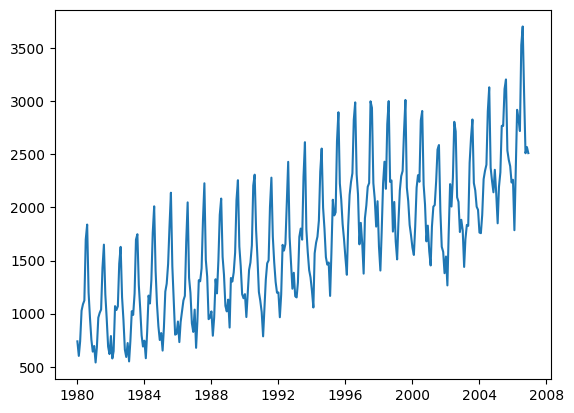

In [89]:
plt.plot(df_uk_limpo.Data, df_uk_limpo.Valor)